# Combination: resnet-random-raw

Resnet 101 customized for 40 outputs
Random split
Raw images (no bounding box)

In [1]:
import torch

import os

import paths

from sysinfo import get_device

from torchvision.datasets import ImageFolder

from transforms import get_resnet_transforms

from resnet import make_model

from train import training_loop

from test_model import test_model



In [2]:
MODEL_ID = 'resnet-random-raw'
TRAIN_DATA_PATH = paths.random_splits_train
TEST_DATA_PATH = paths.random_splits_test
TRANSFORM = get_resnet_transforms()

In [3]:
SAVED_MODEL_PATH = os.path.join(paths.models, MODEL_ID + '.pth')

In [4]:
device = get_device()

PyTorch version: 2.5.1
CUDA available: True
CUDA version: 12.4
GPU device: NVIDIA GeForce RTX 2060
Using device: cuda


In [5]:
dataset = ImageFolder(TRAIN_DATA_PATH, transform=TRANSFORM)
data_loader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True, num_workers=8)

In [6]:
model = make_model(device)

c:\Users\lootman\anaconda3\envs\avpr\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\lootman\anaconda3\envs\avpr\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to C:\Users\lootman/.cache\torch\hub\checkpoints\resnet101-63fe2227.pth
100.0%


In [7]:
if os.path.exists(SAVED_MODEL_PATH):
    model.load_state_dict(torch.load(SAVED_MODEL_PATH))
else:
    training_loop(5, model, data_loader, device)
    torch.save(model.state_dict(), SAVED_MODEL_PATH)

Epoch 1 completed. Loss: 3.8006553649902344
Epoch 2 completed. Loss: 3.8706369400024414
Epoch 3 completed. Loss: 3.134225845336914
Epoch 4 completed. Loss: 3.6171703338623047
Epoch 5 completed. Loss: 3.8517653942108154
Training complete.


In [8]:
test_dataset = ImageFolder(TEST_DATA_PATH, transform=TRANSFORM)
test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True, num_workers=8)


Accuracy of the model on the test images: 11.91%


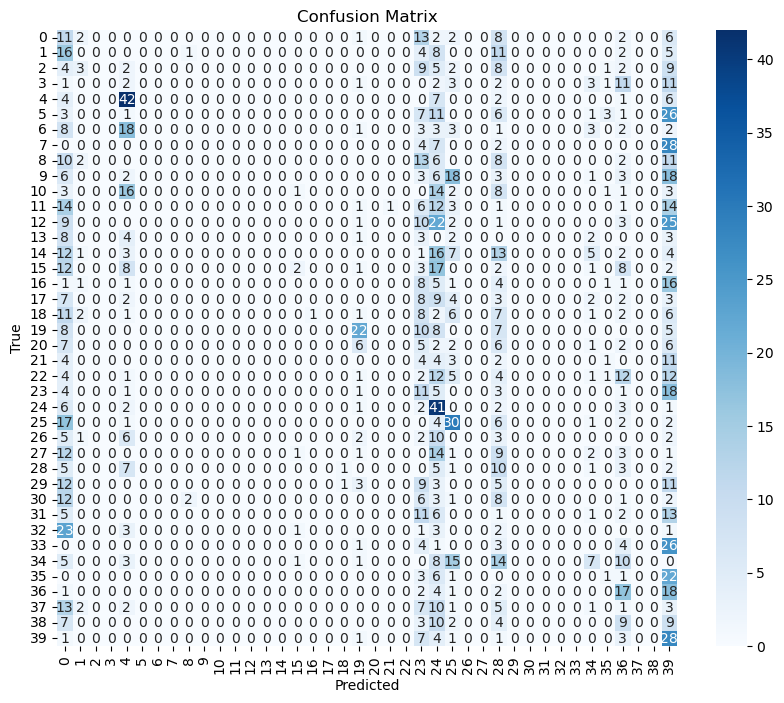

In [9]:
correct, total, accuracy, all_labels, all_predictions = test_model(model, test_data_loader, device)